## Data visualization

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# %% Data Loading #####
my_path = r'/home/abrahamcanafe/PythonProjects/ECE247C/Final_Project/project_data/project/'

X_test = np.load(my_path + 'X_test.npy')
y_test = np.load(my_path + 'y_test.npy')
person_train_valid = np.load(my_path + 'person_train_valid.npy')
X_train_valid = np.load(my_path + 'X_train_valid.npy')
y_train_valid = np.load(my_path + 'y_train_valid.npy')
y_train_valid = (y_train_valid - np.min(y_train_valid)).astype('int')
person_test = np.load(my_path + 'person_test.npy')

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [28]:
np.unique(y_train_valid)

array([0, 1, 2, 3])

In [29]:
np.unique(y_test)

array([769, 770, 771, 772], dtype=int32)

### Time Series Visualization

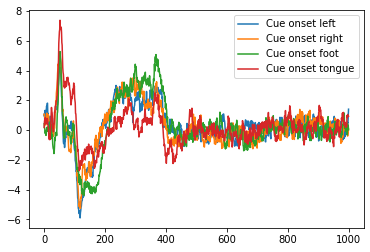

In [30]:
'''
Special thanks to Tonmoy
from whom this cell is adapted.
'''

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

#y_train_valid -= 769
y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,0,:] # extracts the 1st from the data


class_0_ind = np.where(y_train_valid == 0) # finds the indices where the label is 0
ch_data_class_0 = ch_data[class_0_ind] # finds the data where label is 0
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0) # finds the average representation of the 0th channel when label is 0


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
#plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue onset left", "Cue onset right", "Cue onset foot", "Cue onset tongue"])


In [31]:
# https://cvpr2022.thecvf.com/sites/default/files/2021-10/cvpr2022-author_kit-v1_1-1.zip
# http://www.bbci.de/competition/iv/
# https://arxiv.org/pdf/1703.05051.pdf
# https://iopscience.iop.org/article/10.1088/1741-2552/aace8c
# https://github.com/OverLordGoldDragon/ssqueezepy/tree/master/examples/ridge_extraction
# https://medium.com/dataseries/variational-autoencoder-with-pytorch-2d359cbf027b

In [32]:
from ssqueezepy import ssq_cwt, ssq_stft, extract_ridges
from ssqueezepy.visuals import plot, imshow

sr = 250 # sampling rate
penalty = 20 # penalty for ridge extraction

channel_data_train_valid = []
Twxo, Wxo, ssq_freqs, scales = ssq_cwt(X_train_valid[0,0,:], fs=sr)
ridge_idxs = extract_ridges(Twxo, scales, penalty, 1, bw=2)
full_data_train_valid = np.abs(Twxo[ridge_idxs,:])

/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: RuntimeWarning: divide by zero encountered in log
  scales = (np.log(scales) if transform == 'cwt' else
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:89: RuntimeWarning: invalid value encountered in subtract
  dist_matrix = penalty * np.subtract.outer(scales, scales)**2
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: RuntimeWarning: divide by zero encountered in log
  scales = (np.log(scales) if transform == 'cwt' else
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:89: RuntimeWarning: invalid value encountered in subtract
  dist_matrix = penalty * np.subtract.outer(scales, scales)**2
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: 

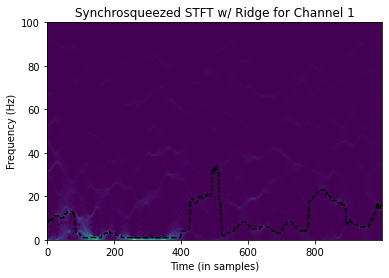

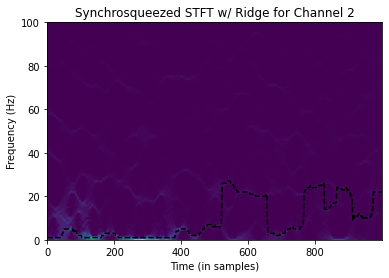

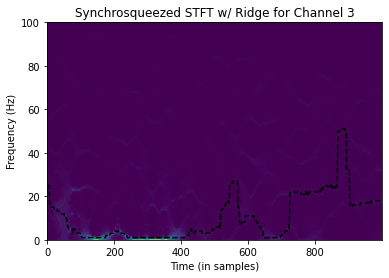

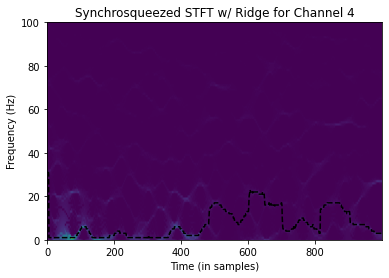

In [33]:
average_data_list = [avg_ch_data_class_0,
                     avg_ch_data_class_1,
                     avg_ch_data_class_2,
                     avg_ch_data_class_3]

### Plots for synchrosqueezed STFT with ridge extraction ###
for i,v in enumerate([*range(4)]):
    Twxo, Wxo, ssq_freqs, scales = ssq_stft(average_data_list[i], fs=sr)
    plt.figure()
    plt.imshow(np.abs(Twxo), aspect='auto') # cmap='turbo'
    ridge_idxs = extract_ridges(Twxo, ssq_freqs, 20, 1, bw=2)
    plt.plot(ridge_idxs,linestyle='--',color='black')
    #imshow(Wxo, **fmt_1)
    #plot(ridge_idxs, **fmt_2, show=1)
    plt.xlabel('Time (in samples)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Synchrosqueezed STFT w/ Ridge for Channel ' + str(i+1))
    plt.ylim([0,100])

/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: RuntimeWarning: divide by zero encountered in log
  scales = (np.log(scales) if transform == 'cwt' else
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:89: RuntimeWarning: invalid value encountered in subtract
  dist_matrix = penalty * np.subtract.outer(scales, scales)**2
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: RuntimeWarning: divide by zero encountered in log
  scales = (np.log(scales) if transform == 'cwt' else
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:89: RuntimeWarning: invalid value encountered in subtract
  dist_matrix = penalty * np.subtract.outer(scales, scales)**2
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: 

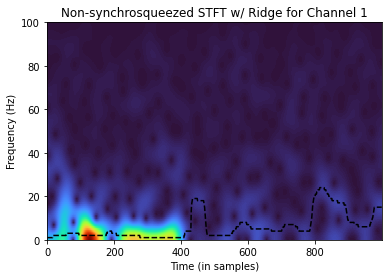

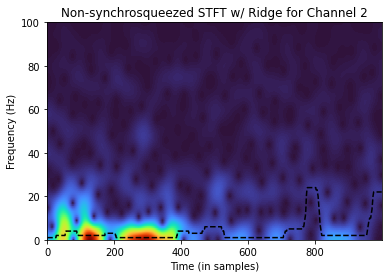

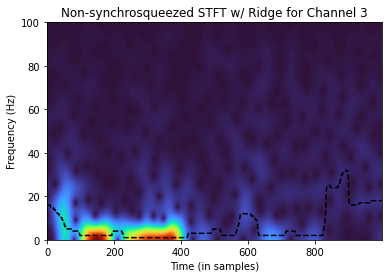

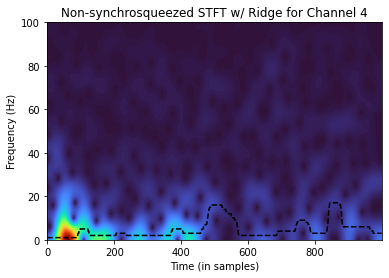

In [34]:
### Plots for nonsynchrosqueezed CWT with ridge extraction ###
for i,v in enumerate([*range(4)]):
    Twxo, Wxo, ssq_freqs, scales = ssq_stft(average_data_list[i], fs=sr)
    plt.figure()
    plt.imshow(np.abs(Wxo), aspect='auto', cmap='turbo') # 
    ridge_idxs = extract_ridges(Wxo, ssq_freqs, 20, 1, bw=2)
    plt.plot(ridge_idxs,linestyle='--',color='black')
    #imshow(Wxo, **fmt_1)
    #plot(ridge_idxs, **fmt_2, show=1)
    plt.xlabel('Time (in samples)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Non-synchrosqueezed STFT w/ Ridge for Channel ' + str(i+1))
    plt.ylim([0,100])

/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: RuntimeWarning: divide by zero encountered in log
  scales = (np.log(scales) if transform == 'cwt' else
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:89: RuntimeWarning: invalid value encountered in subtract
  dist_matrix = penalty * np.subtract.outer(scales, scales)**2
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: RuntimeWarning: divide by zero encountered in log
  scales = (np.log(scales) if transform == 'cwt' else
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:89: RuntimeWarning: invalid value encountered in subtract
  dist_matrix = penalty * np.subtract.outer(scales, scales)**2
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: 

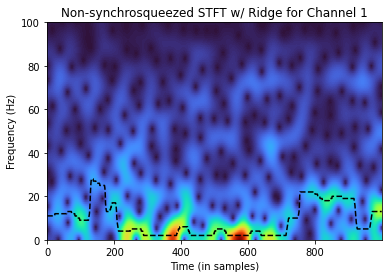

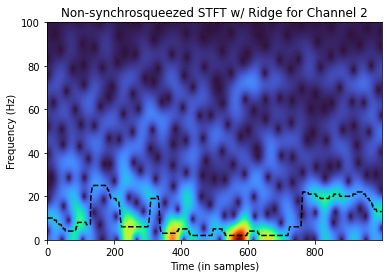

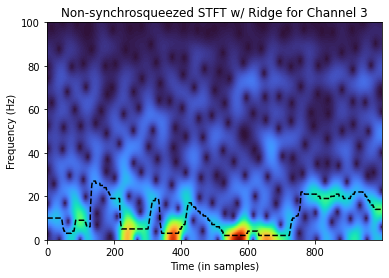

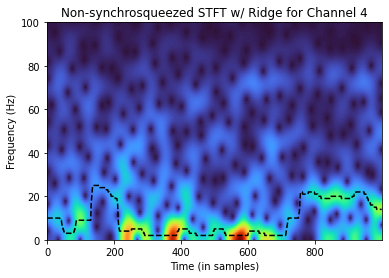

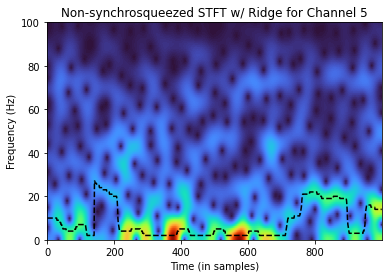

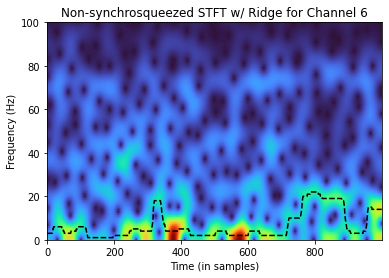

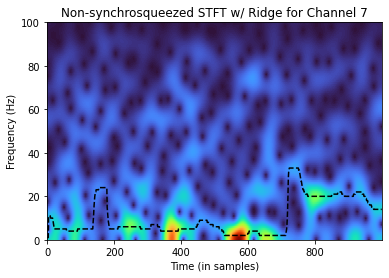

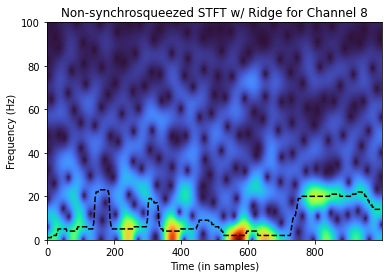

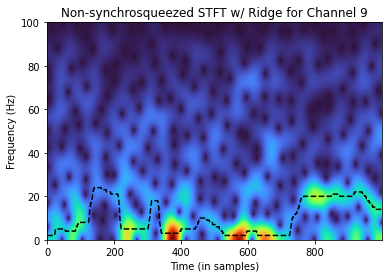

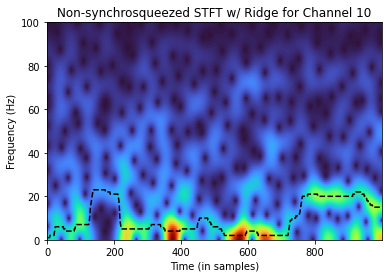

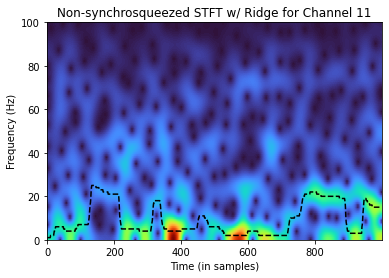

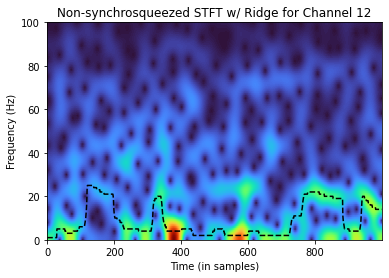

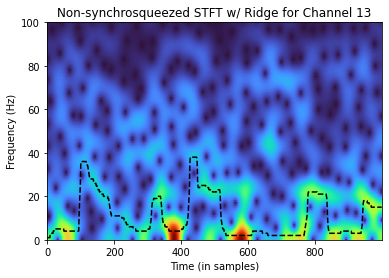

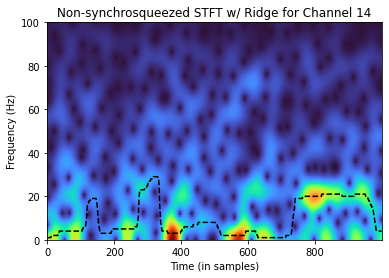

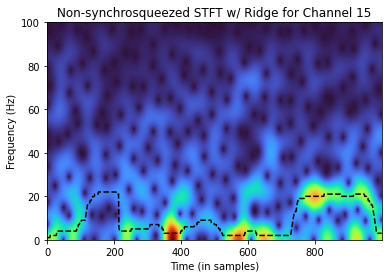

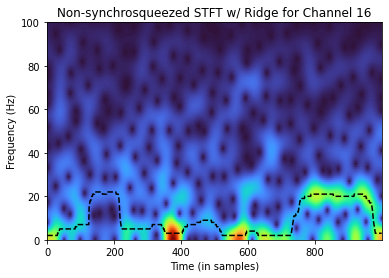

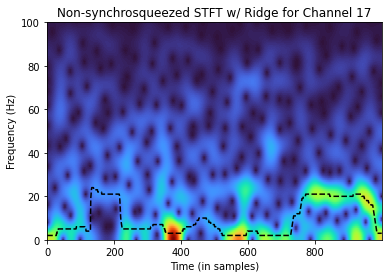

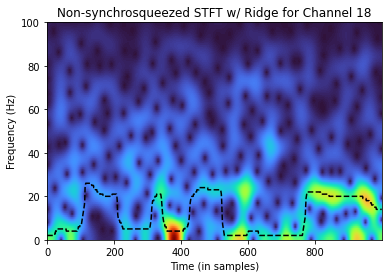

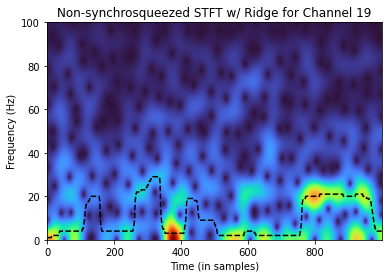

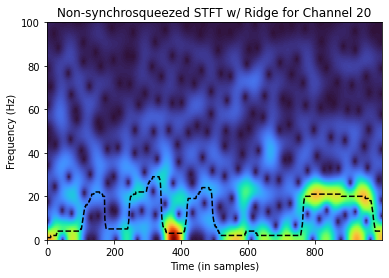

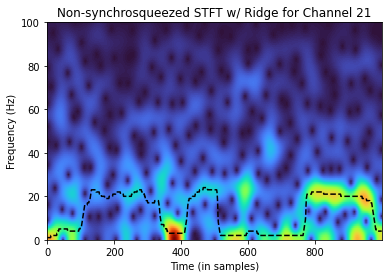

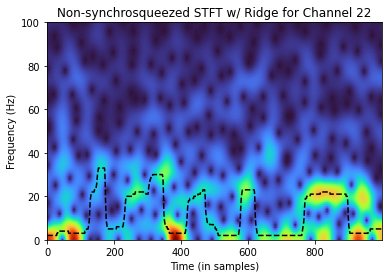

In [35]:
sr = 250 # sampling rate
penalty = 20 # penalty for ridge extraction

### Plots for synchrosqueezed STFT with ridge extraction ###
'''
for i,v in enumerate([*range(22)]):
    Twxo, Wxo, ssq_freqs, scales = ssq_stft(X_train_valid[0,i,:], fs=sr)
    plt.figure()
    plt.imshow(np.abs(Twxo), aspect='auto') # cmap='turbo'
    ridge_idxs = extract_ridges(Twxo, ssq_freqs, 20, 1, bw=2)
    plt.plot(ridge_idxs,linestyle='--',color='black')
    #imshow(Wxo, **fmt_1)
    #plot(ridge_idxs, **fmt_2, show=1)
    plt.xlabel('Time (in samples)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Synchrosqueezed STFT w/ Ridge for Channel ' + str(i+1))
    plt.ylim([0,100])
'''

### Plots for nonsynchrosqueezed CWT with ridge extraction ###
for i,v in enumerate([*range(22)]):
    Twxo, Wxo, ssq_freqs, scales = ssq_stft(X_train_valid[0,i,:], fs=sr)
    plt.figure()
    plt.imshow(np.abs(Wxo), aspect='auto', cmap='turbo') # 
    ridge_idxs = extract_ridges(Wxo, ssq_freqs, 20, 1, bw=2)
    plt.plot(ridge_idxs,linestyle='--',color='black')
    #imshow(Wxo, **fmt_1)
    #plot(ridge_idxs, **fmt_2, show=1)
    plt.xlabel('Time (in samples)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Non-synchrosqueezed STFT w/ Ridge for Channel ' + str(i+1))
    plt.ylim([0,100])

/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: RuntimeWarning: divide by zero encountered in log
  scales = (np.log(scales) if transform == 'cwt' else
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:89: RuntimeWarning: invalid value encountered in subtract
  dist_matrix = penalty * np.subtract.outer(scales, scales)**2
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: RuntimeWarning: divide by zero encountered in log
  scales = (np.log(scales) if transform == 'cwt' else
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:89: RuntimeWarning: invalid value encountered in subtract
  dist_matrix = penalty * np.subtract.outer(scales, scales)**2
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/ssqueezepy/ridge_extraction.py:119: 

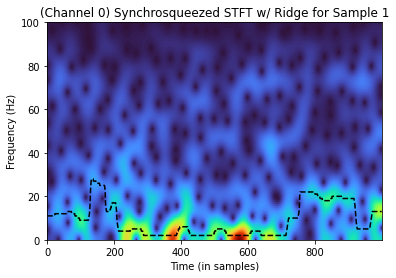

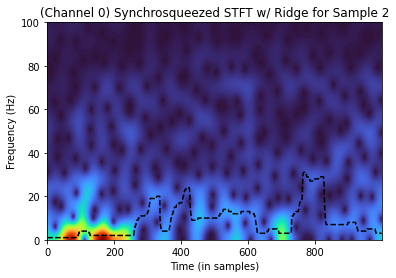

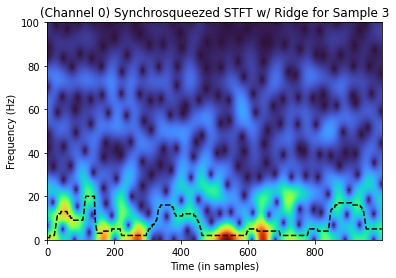

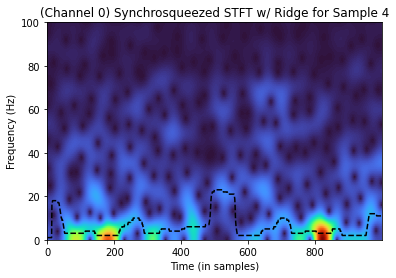

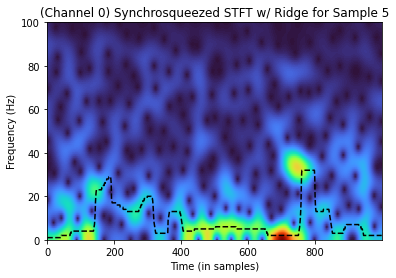

In [36]:
### Plots for nonsynchrosqueezed CWT with ridge extraction ###
for i,v in enumerate([*range(5)]):
    Twxo, Wxo, ssq_freqs, scales = ssq_stft(X_train_valid[i,0,:], fs=sr)
    plt.figure()
    plt.imshow(np.abs(Wxo), aspect='auto', cmap='turbo') # 
    ridge_idxs = extract_ridges(Wxo, ssq_freqs, 20, 1, bw=2)
    plt.plot(ridge_idxs,linestyle='--',color='black')
    #imshow(Wxo, **fmt_1)
    #plot(ridge_idxs, **fmt_2, show=1)
    plt.xlabel('Time (in samples)')
    plt.ylabel('Frequency (Hz)')
    plt.title('(Channel 0) Synchrosqueezed STFT w/ Ridge for Sample ' + str(i+1))
    plt.ylim([0,100])

#### Channel 0

/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting c

(-100.0, 100.0)

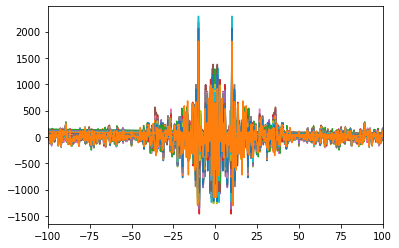

In [37]:
all
plt.figure()
for i,v in enumerate([*range(22)]):
    freqs = np.fft.fftfreq(1000, d=1/sr)
    Ft = np.fft.fft(X_train_valid[0,i,:])
    plt.plot(freqs,Ft)
    
plt.xlim([-100,100])

#### Channel 1

/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting c

Text(0.5, 1.0, 'FFT for Instance 1, all channels')

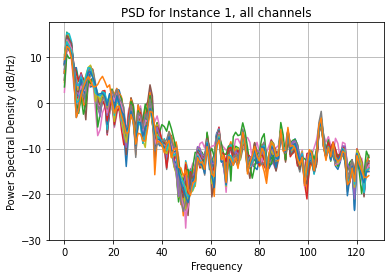

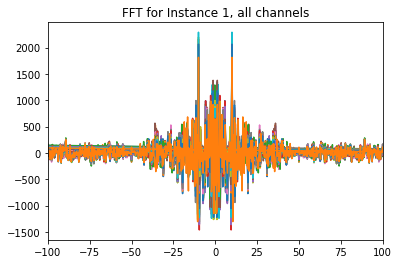

In [38]:
sr = 250 # sampling rate
for i,v in enumerate([*range(22)]):
    plt.psd(X_train_valid[0,i,:], Fs=sr)


plt.title('PSD for Instance 1, all channels')
    
plt.figure()
for i,v in enumerate([*range(22)]):
    freqs = np.fft.fftfreq(1000, d=1/sr)
    Ft = np.fft.fft(X_train_valid[0,i,:])
    plt.plot(freqs,Ft)
    
plt.xlim([-100,100])
plt.title('FFT for Instance 1, all channels')


Text(0, 0.5, 'Mean (window size = 60)')

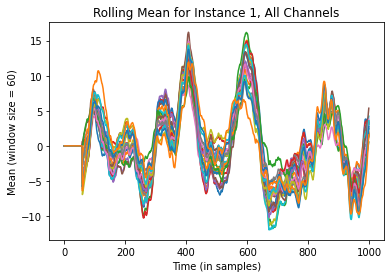

In [39]:
n_samples = X_train_valid.shape[0]
rolling_window = 60

##### Sample 0, all channels
import pandas as pd

for channel_num, v in enumerate(range(22)): # all channels
    temp_signal = pd.Series(X_train_valid[0,channel_num,:]) ### sample 0 
    
    temp_mean = np.asarray(temp_signal.rolling(rolling_window).mean())
    #temp_var = np.asarray(temp_signal.rolling(rolling_window).var())
    #temp_kurt = np.asarray(temp_signal.rolling(rolling_window).kurt())
    
    #signal_stats = (temp_mean,temp_var,temp_kurt)


    plt.plot([*range(1000)], np.nan_to_num(temp_mean))

plt.title('Rolling Mean for Instance 1, All Channels')
plt.xlabel('Time (in samples)')
plt.ylabel('Mean (window size = 60)')

Text(0, 0.5, 'Variance (window size = 60)')

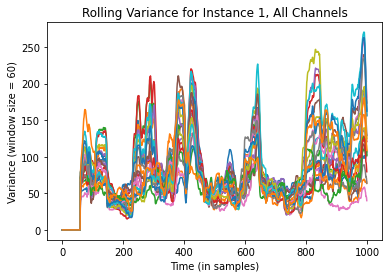

In [40]:
n_samples = X_train_valid.shape[0]
rolling_window = 60

##### Sample 0, all channels
import pandas as pd

for channel_num, v in enumerate(range(22)): # all channels
    temp_signal = pd.Series(X_train_valid[0,channel_num,:]) ### sample 0 
    
    #temp_mean = np.asarray(temp_signal.rolling(rolling_window).mean())
    temp_var = np.asarray(temp_signal.rolling(rolling_window).var())
    #temp_kurt = np.asarray(temp_signal.rolling(rolling_window).kurt())
    
    #signal_stats = (temp_mean,temp_var,temp_kurt)


    plt.plot([*range(1000)], np.nan_to_num(temp_var))


plt.title('Rolling Variance for Instance 1, All Channels')
plt.xlabel('Time (in samples)')
plt.ylabel('Variance (window size = 60)')

Text(0, 0.5, 'Mean (window size = 60)')

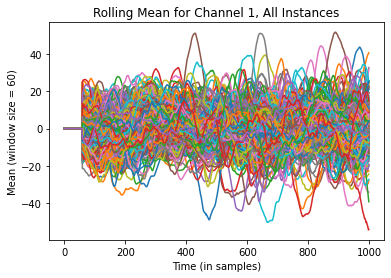

In [41]:
n_samples = X_train_valid.shape[0]
rolling_window = 60
import pandas as pd

for sample_num, v in enumerate(range(n_samples)): # all samples
    temp_signal = pd.Series(X_train_valid[sample_num,0,:]) ### channel 0 
    
    temp_mean = np.asarray(temp_signal.rolling(rolling_window).mean())
    #temp_var = np.asarray(temp_signal.rolling(rolling_window).var())
    #temp_kurt = np.asarray(temp_signal.rolling(rolling_window).kurt())
    
    #signal_stats = (temp_mean,temp_var,temp_kurt)


    plt.plot([*range(1000)], np.nan_to_num(temp_mean))


plt.title('Rolling Mean for Channel 1, All Instances')
plt.xlabel('Time (in samples)')
plt.ylabel('Mean (window size = 60)')

Text(0, 0.5, 'Variance (window size = 60)')

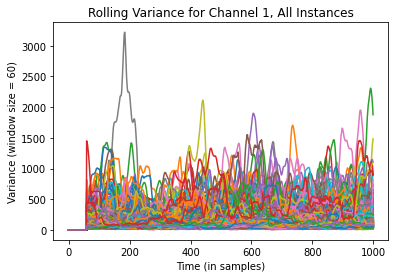

In [42]:
n_samples = X_train_valid.shape[0]
rolling_window = 60
import pandas as pd

for sample_num, v in enumerate(range(n_samples)): # all samples
    temp_signal = pd.Series(X_train_valid[sample_num,0,:]) ### channel 0 
    
    #temp_mean = np.asarray(temp_signal.rolling(rolling_window).mean())
    temp_var = np.asarray(temp_signal.rolling(rolling_window).var())
    #temp_kurt = np.asarray(temp_signal.rolling(rolling_window).kurt())
    
    #signal_stats = (temp_mean,temp_var,temp_kurt)


    plt.plot([*range(1000)], np.nan_to_num(temp_var))


plt.title('Rolling Variance for Channel 1, All Instances')
plt.xlabel('Time (in samples)')
plt.ylabel('Variance (window size = 60)')

### Increasing timestep indices

Text(0.5, 1.0, 'Evaluation of CNN Model')

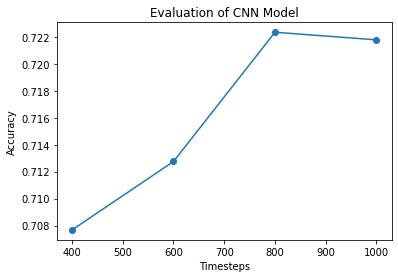

In [43]:
timesteps = np.array([400,600,800,1000])
accs = np.array([0.7076749435665914, 0.7127539503386005, 0.7223476297968398, 0.7217832957110609])
plt.plot(timesteps,accs,'-o')
plt.xlabel('Timesteps')
plt.ylabel('Accuracy')
plt.title('Evaluation of CNN Model')

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
from nndl.architectures import DeepConvNet, DeepConvLSTM, DeepConvTransformer

In [45]:
n_time_steps = 1000
model = DeepConvNet(input_shape=(22,n_time_steps), n_input_channels = 22, n_spatial_filters=50, n_classes=4)
#model = DeepConvLSTM().
#model = DeepConvTransformer()

/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [46]:
reshaped_x = X_train_valid.reshape(-1,22,1,1000)

In [47]:
reshaped_x.shape

(2115, 22, 1, 1000)

In [48]:
print(model)
summary(model, reshaped_x.shape) ### temporal convolution

DeepConvNet(
  (conv1): Conv2d(22, 50, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn1): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): AvgPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0)
  (drop1): Dropout(p=0.5, inplace=False)
  (conv2): Conv2d(50, 100, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn2): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): AvgPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0)
  (drop2): Dropout(p=0.5, inplace=False)
  (conv3): Conv2d(100, 200, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn3): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): AvgPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0)
  (drop3): Dropout(p=0.5, inplace=False)
  (conv4): Conv2d(200, 400, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn4): BatchNorm2d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): AvgPool2d(kernel_siz

Layer (type:depth-idx)                   Output Shape              Param #
DeepConvNet                              [2115, 4]                 801,200
├─Conv2d: 1-1                            [2115, 50, 1, 991]        11,050
├─ELU: 1-2                               [2115, 50, 1, 991]        --
├─AvgPool2d: 1-3                         [2115, 50, 1, 330]        --
├─BatchNorm2d: 1-4                       [2115, 50, 1, 330]        100
├─Dropout: 1-5                           [2115, 50, 1, 330]        --
├─Conv2d: 1-6                            [2115, 100, 1, 321]       50,100
├─ELU: 1-7                               [2115, 100, 1, 321]       --
├─AvgPool2d: 1-8                         [2115, 100, 1, 107]       --
├─BatchNorm2d: 1-9                       [2115, 100, 1, 107]       200
├─Dropout: 1-10                          [2115, 100, 1, 107]       --
├─Conv2d: 1-11                           [2115, 200, 1, 98]        200,200
├─ELU: 1-12                              [2115, 200, 1, 98]      

In [49]:
model = DeepConvLSTM(input_shape=(22,n_time_steps), n_input_channels = 22, n_spatial_filters=50, n_classes=4)
print(model)
summary(model, reshaped_x.shape) ### temporal convolution

/home/abrahamcanafe/anaconda3/envs/jupyter-env/lib/python3.10/site-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


DeepConvLSTM(
  (conv1): Conv2d(22, 50, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn1): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): AvgPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0)
  (drop1): Dropout(p=0.5, inplace=False)
  (conv2): Conv2d(50, 100, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn2): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): AvgPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0)
  (drop2): Dropout(p=0.5, inplace=False)
  (conv3): Conv2d(100, 200, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn3): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): AvgPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0)
  (drop3): Dropout(p=0.5, inplace=False)
  (conv4): Conv2d(200, 400, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn4): BatchNorm2d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): AvgPool2d(kernel_si

Layer (type:depth-idx)                   Output Shape              Param #
DeepConvLSTM                             [2115, 4]                 1,001,800
├─Conv2d: 1-1                            [2115, 50, 1, 991]        11,050
├─ELU: 1-2                               [2115, 50, 1, 991]        --
├─AvgPool2d: 1-3                         [2115, 50, 1, 330]        --
├─BatchNorm2d: 1-4                       [2115, 50, 1, 330]        100
├─Dropout: 1-5                           [2115, 50, 1, 330]        --
├─Conv2d: 1-6                            [2115, 100, 1, 321]       50,100
├─ELU: 1-7                               [2115, 100, 1, 321]       --
├─AvgPool2d: 1-8                         [2115, 100, 1, 107]       --
├─BatchNorm2d: 1-9                       [2115, 100, 1, 107]       200
├─Dropout: 1-10                          [2115, 100, 1, 107]       --
├─Linear: 1-11                           [2115, 100]               1,070,100
├─LSTM: 1-12                             [2115, 10]          

In [50]:
model = DeepConvTransformer(input_shape=(22,n_time_steps), n_input_channels = 22, n_spatial_filters=50, n_classes=4)
print(model)
summary(model, reshaped_x.shape) ### temporal convolution


DeepConvTransformer(
  (conv1): Conv2d(22, 50, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn1): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): AvgPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0)
  (drop1): Dropout(p=0.5, inplace=False)
  (conv2): Conv2d(50, 100, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn2): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): AvgPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0)
  (drop2): Dropout(p=0.5, inplace=False)
  (conv3): Conv2d(100, 200, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn3): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): AvgPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0)
  (drop3): Dropout(p=0.5, inplace=False)
  (conv4): Conv2d(200, 400, kernel_size=(1, 10), stride=(1, 1))
  (conv_bn4): BatchNorm2d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): AvgPool2d(ke

Layer (type:depth-idx)                   Output Shape              Param #
DeepConvTransformer                      [2115, 4]                 1,001,800
├─Conv2d: 1-1                            [2115, 50, 1, 991]        11,050
├─ELU: 1-2                               [2115, 50, 1, 991]        --
├─AvgPool2d: 1-3                         [2115, 50, 1, 330]        --
├─BatchNorm2d: 1-4                       [2115, 50, 1, 330]        100
├─Dropout: 1-5                           [2115, 50, 1, 330]        --
├─Conv2d: 1-6                            [2115, 100, 1, 321]       50,100
├─ELU: 1-7                               [2115, 100, 1, 321]       --
├─AvgPool2d: 1-8                         [2115, 100, 1, 107]       --
├─BatchNorm2d: 1-9                       [2115, 100, 1, 107]       200
├─Dropout: 1-10                          [2115, 100, 1, 107]       --
├─Linear: 1-11                           [2115, 100]               1,070,100
├─TransformerEncoderLayer: 1-12          [2115, 100]         